In [2]:
import pandas as pd

# Load the McDonald's nutrition dataset from CSV
df_mcdonalds = pd.read_csv('menu.csv')

# Display the first few rows of the dataset
print(df_mcdonalds.head())


    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates  \
0            

In [6]:
import pandas as pd

# Load the McDonald's nutrition dataset from CSV
df_mcdonalds = pd.read_csv('menu.csv')

# Display the first few rows of the dataset
print(df_mcdonalds.head())

# Handle missing values (if any)
# Only calculate the mean for numeric columns
numeric_cols = df_mcdonalds.select_dtypes(include=['number']).columns
df_mcdonalds[numeric_cols] = df_mcdonalds[numeric_cols].fillna(df_mcdonalds[numeric_cols].mean())

# Rename columns for clarity (if needed)
# Replace 'old_name' and 'new_name' with your desired column names if needed
# For example, to rename 'Calories' to 'Total Calories':
df_mcdonalds = df_mcdonalds.rename(columns={'Calories': 'Total Calories'})
# If no renaming is needed, you can comment out or remove this line

print(df_mcdonalds.head()) # Display the DataFrame after changes

    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates  \
0            

<ipython-input-11-33b144a89e46>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=0)


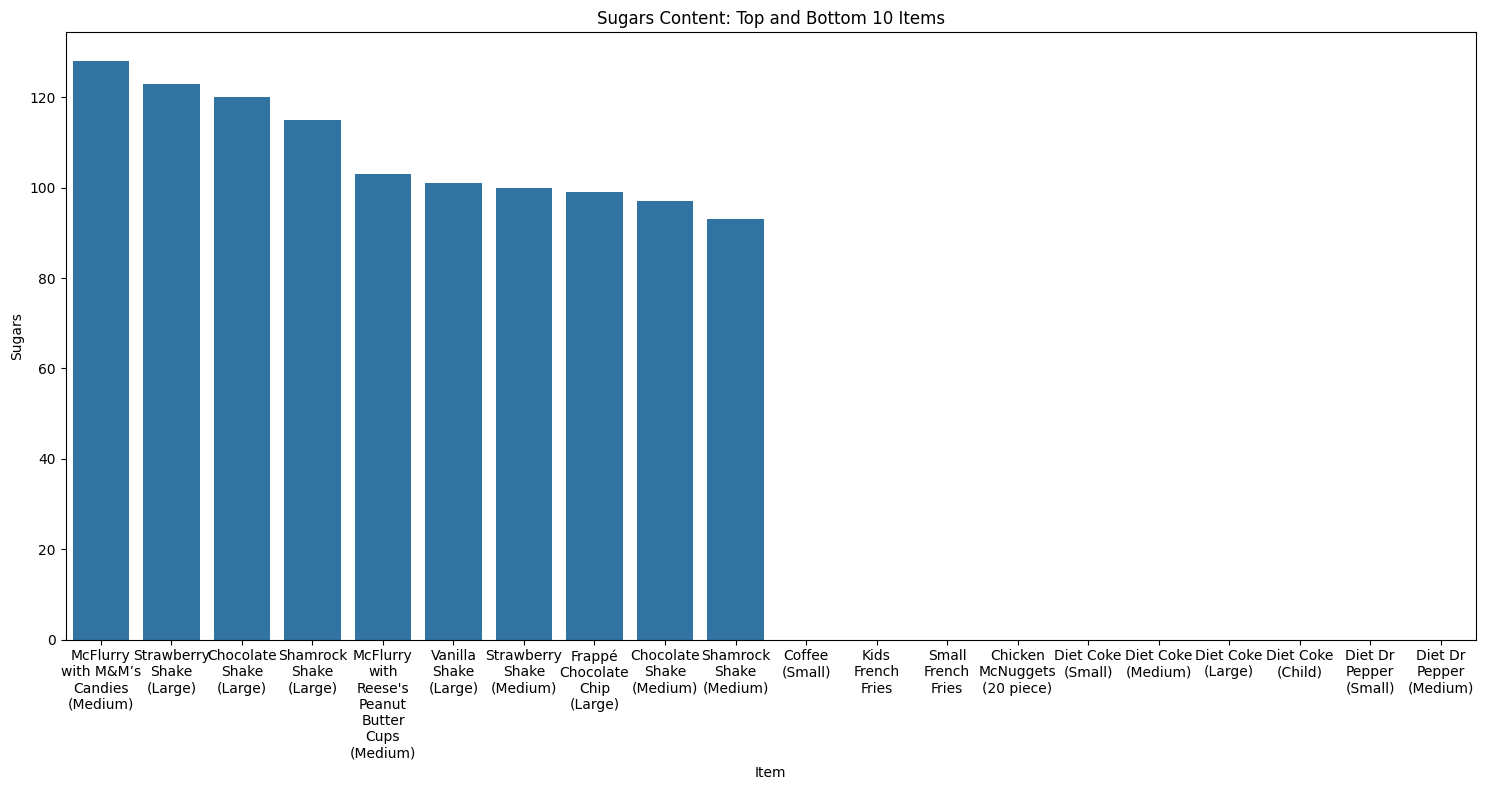

<ipython-input-11-33b144a89e46>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=0)


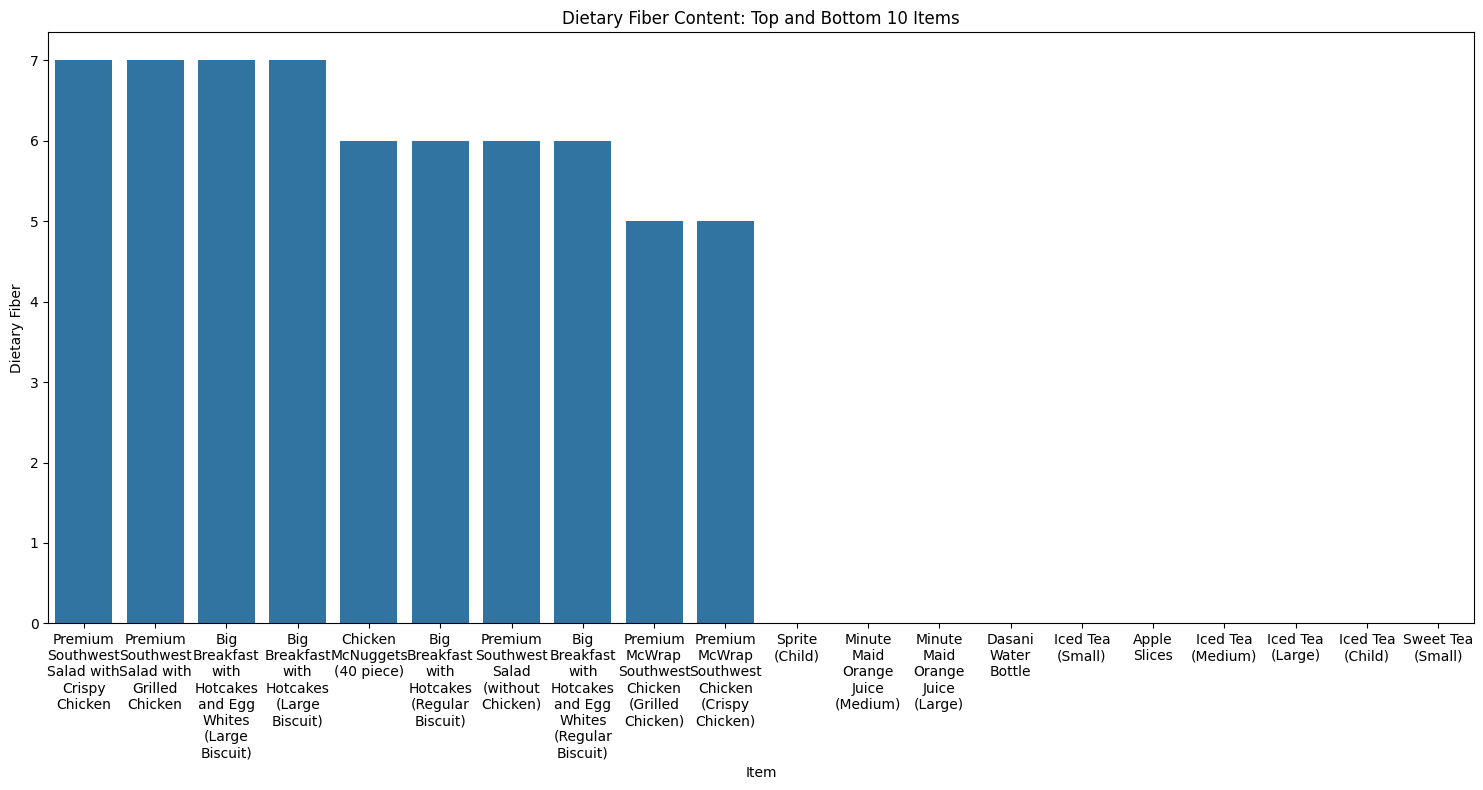

<ipython-input-11-33b144a89e46>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=0)


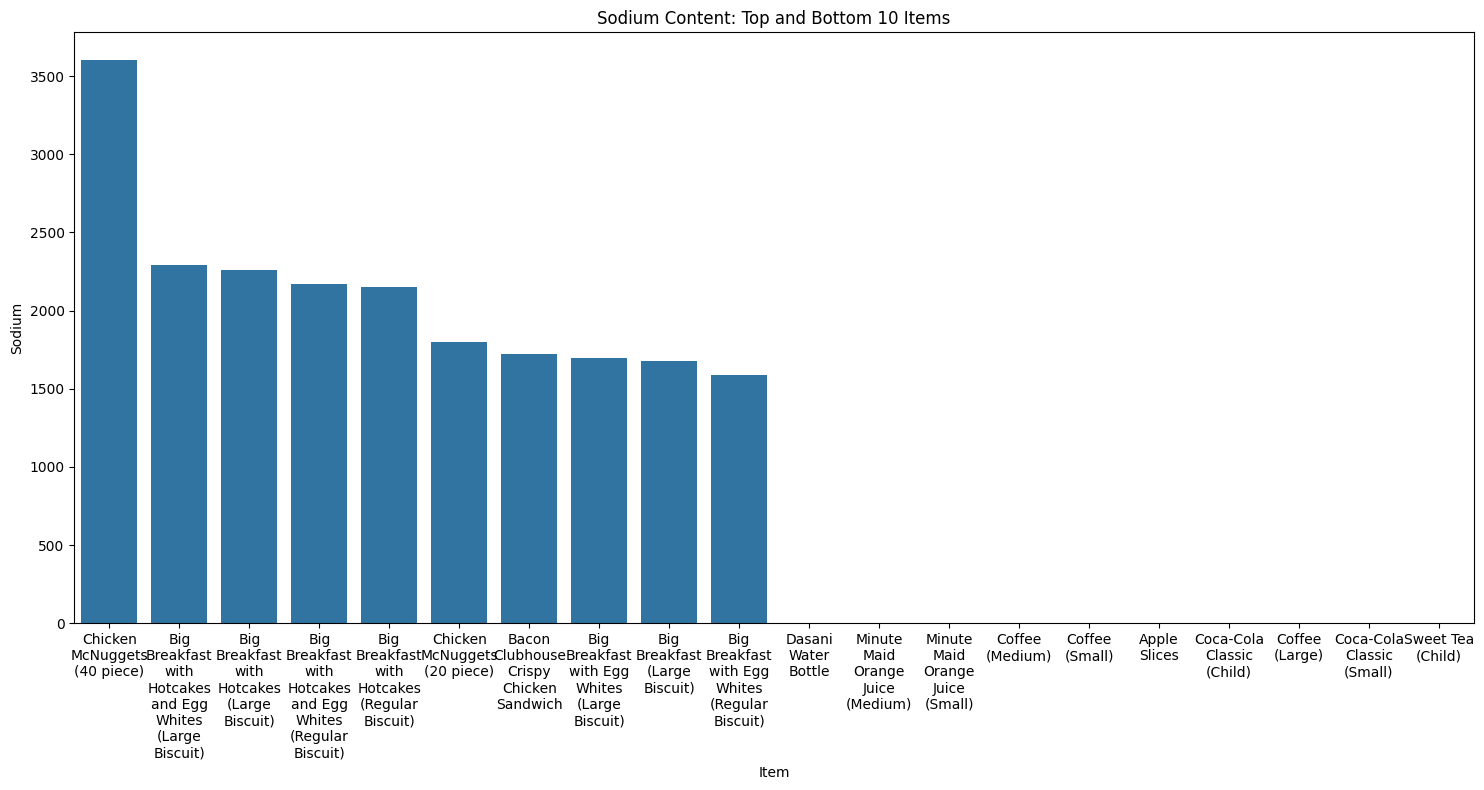

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import pandas as pd
import numpy as np

# Function to wrap text
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

# Function to plot top and bottom n items
def plot_top_bottom_n(df, nutrient, n=10):
    # Sort by nutrient content and select top and bottom n
    top_n = df.sort_values(by=nutrient, ascending=False).head(n)
    bottom_n = df.sort_values(by=nutrient, ascending=True).head(n)

    # Concatenate top and bottom dataframes
    plot_df = pd.concat([top_n, bottom_n])

    # Create the plot
    plt.figure(figsize=(15, 8))
    ax = sns.barplot(x='Item', y=nutrient, data=plot_df)
    plt.title(f'{nutrient} Content: Top and Bottom {n} Items')
    wrap_labels(ax, width=10)  # Wrap labels for better readability
    plt.tight_layout()
    plt.show()

# Plot for sugar content
plot_top_bottom_n(df_mcdonalds, 'Sugars')

# Plot for fiber content
plot_top_bottom_n(df_mcdonalds, 'Dietary Fiber')

# Plot for sodium content
plot_top_bottom_n(df_mcdonalds, 'Sodium')

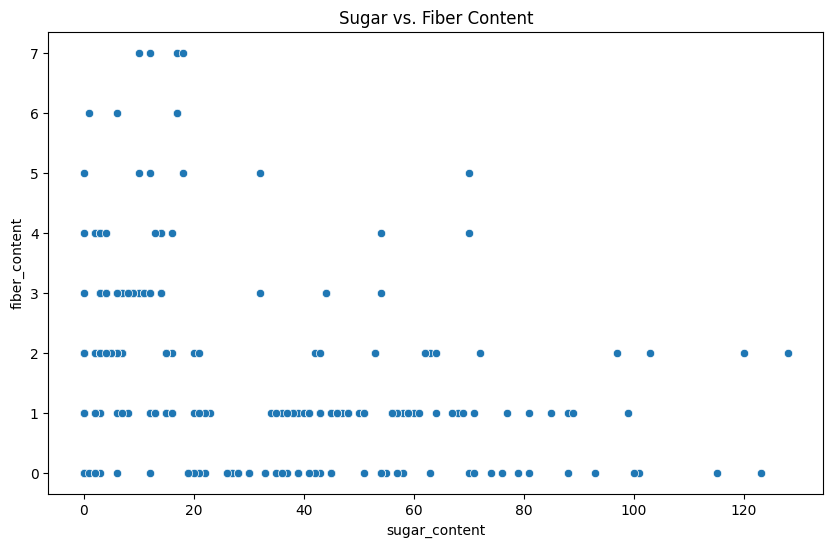

           Category                                               Item  \
38        Breakfast                                         Hash Brown   
41        Breakfast          Fruit & Maple Oatmeal without Brown Sugar   
48      Beef & Pork                                          Hamburger   
78   Chicken & Fish                        Chicken McNuggets (4 piece)   
84           Salads        Premium Bacon Ranch Salad (without Chicken)   
..              ...                                                ...   
205    Coffee & Tea                 French Vanilla Iced Coffee (Small)   
206    Coffee & Tea                French Vanilla Iced Coffee (Medium)   
208    Coffee & Tea  Iced Coffee with Sugar Free French Vanilla Syr...   
209    Coffee & Tea  Iced Coffee with Sugar Free French Vanilla Syr...   
210    Coffee & Tea  Iced Coffee with Sugar Free French Vanilla Syr...   

       Serving Size  Total Calories  Calories from Fat  Total Fat  \
38      2 oz (56 g)             150       

In [16]:
# Compare sugar vs. fiber
# Assuming 'Sugars' is the column for sugar content and 'Dietary Fiber' for fiber content
# Rename the columns to 'sugar_content' and 'fiber_content' for clarity:
df_mcdonalds = df_mcdonalds.rename(columns={'Sugars': 'sugar_content', 'Dietary Fiber': 'fiber_content'})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='sugar_content', y='fiber_content', data=df_mcdonalds)
plt.title('Sugar vs. Fiber Content')
plt.show()

# Create 'sodium_content' column if it doesn't exist
# This line should be moved before attempting to access 'sodium_content'
if 'sodium_content' not in df_mcdonalds.columns:
    df_mcdonalds = df_mcdonalds.rename(columns={'Sodium': 'sodium_content'})

# Identify healthier options
healthier_options = df_mcdonalds[(df_mcdonalds['sugar_content'] < df_mcdonalds['sugar_content'].mean()) &
                                (df_mcdonalds['sodium_content'] < df_mcdonalds['sodium_content'].mean())]  # Assuming 'Sodium' is the column for sodium content

print(healthier_options)

In [5]:
!pip install dash
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd # Import pandas

# Load your data here
df_mcdonalds = pd.read_csv('menu.csv') # Assuming your data file is named 'menu.csv'

# Rename necessary columns for consistency:
df_mcdonalds = df_mcdonalds.rename(columns={'Sugars': 'sugar_content', 'Dietary Fiber': 'fiber_content', 'Item': 'menu_item', 'Sodium': 'sodium_content'})

app = dash.Dash(__name__)

# Create a bar chart for sugar content
fig_sugar = px.bar(df_mcdonalds, x='menu_item', y='sugar_content')

# Create a bar chart for fiber content
fig_fiber = px.bar(df_mcdonalds, x='menu_item', y='fiber_content')

# Create a bar chart for sodium content
fig_sodium = px.bar(df_mcdonalds, x='menu_item', y='sodium_content')

app.layout = html.Div([
    html.H1('McDonald\'s Nutrition Dashboard'),
    dcc.Tabs(id='tabs', value='tab-1', children=[
        dcc.Tab(label='Sugar Content', value='tab-1'),
        dcc.Tab(label='Fiber Content', value='tab-2'),
        dcc.Tab(label='Sodium Content', value='tab-3')
    ]),
    html.Div(id='tabs-content')
])

@app.callback(Output('tabs-content', 'children'),
              Input('tabs', 'value'))
def render_content(tab):
    if tab == 'tab-1':
        return html.Div([dcc.Graph(figure=fig_sugar)])
    elif tab == 'tab-2':
        return html.Div([dcc.Graph(figure=fig_fiber)])
    elif tab == 'tab-3':
        return html.Div([dcc.Graph(figure=fig_sodium)])

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>